# Populations

In [1]:
import pandas as pd

#First, let's open the txt file and insert the data into a panda data frame
df = pd.read_csv("populations.txt", 
                sep='\t',
                names=['year', 'hare', 'lynx', 'carrot'],
                index_col='year',
                skiprows=1)
df.head()

,hare,lynx,carrot
year,,,
1900,30000.0,4000.0,48300
1901,47200.0,6100.0,48200
1902,70200.0,9800.0,41500
1903,77400.0,35200.0,38200
1904,36300.0,59400.0,40600


## The mean and std of the populations of each species for the years in the period

In [2]:
print("==== MEAN ====")
print(df.mean())

print("\n==== STD ====")
print(df.std())

==== MEAN ====
hare      34080.952381
lynx      20166.666667
carrot    42400.000000
dtype: float64

==== STD ====
hare      21413.981859
lynx      16655.999920
carrot     3404.555771
dtype: float64


## Which year each species had the largest population

In [3]:
print(df.idxmax()) #Gives us the id of the maximal value for each column

hare      1903
lynx      1904
carrot    1900
dtype: int64


## Which species has the largest population for each year. (Hint: rank and idxmin)

In [4]:
print(df.idxmax(1)) #Same as before but for each line

year
1900    carrot
1901    carrot
1902      hare
1903      hare
1904      lynx
1905      lynx
1906    carrot
1907    carrot
1908    carrot
1909    carrot
1910    carrot
1911    carrot
1912      hare
1913      hare
1914      hare
1915      lynx
1916    carrot
1917    carrot
1918    carrot
1919    carrot
1920    carrot
dtype: object


## Which years any of the populations is above 50000. (Hint: any)

In [5]:
df2 = df[df > 50000].any(axis='columns') #This gives back True if any of the species of the given year is > 50.000
print(df2[df2].index) #This prints only the years for which the df2 serie is True

Int64Index([1902, 1903, 1904, 1912, 1913, 1914, 1915], dtype='int64', name='year')


## The top 2 years for each species when they had the lowest populations. (Hint: rank)

In [47]:
#First, let's try one solution that works using the nsmallest method of panda dataframes
print(df.nsmallest(2, ['hare'])['hare'])
print()
print(df.nsmallest(2, ['lynx'])['lynx'])
print()
print(df.nsmallest(2, ['carrot'])['carrot'])

#Let's now try to use the rank method as suggested for one of the species
print()
rank = df.rank(axis=0, ascending=True)
print("Top 2 years for the hare: " + str(df['hare'].loc[rank['hare'].isin([1.0, 2.0])]))

year
1917     7600.0
1916    11200.0
Name: hare, dtype: float64

year
1900    4000.0
1901    6100.0
Name: lynx, dtype: float64

year
1916    36700
1903    38200
Name: carrot, dtype: int64

Top 2 years for the hare: year
1916    11200.0
1917     7600.0
Name: hare, dtype: float64


## Compare (plot) the change in hare population (see help(np.gradient)) and the number of lynxes. Check correlation (see help(df.corr))

In [48]:
import numpy as np
import matplotlib.pyplot as pyplot

%matplotlib inline

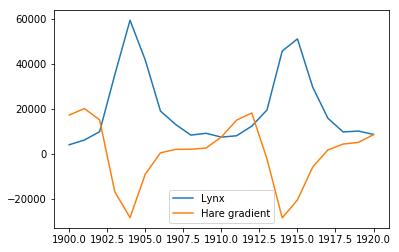


Correlation matrix between the change in hare population and number of lynxes... 
            hare      lynx    carrot
hare    1.000000  0.071892 -0.016604
lynx    0.071892  1.000000 -0.680577
carrot -0.016604 -0.680577  1.000000


In [63]:
pyplot.plot(df.index, df['lynx'])
pyplot.plot(df.index, np.gradient(df['hare']))
pyplot.legend(['Lynx', 'Hare gradient'])
pyplot.show()

print("\nCorrelation matrix between the change in hare population and number of lynxes... \n" + str(df.corr()))